<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object Landmark Detection with Face Detection**<br>
Face recognition is an easy task for humans. Experiments have shown, that even one to three day old babies are able to distinguish between known faces. <br>

So how hard could it be for a computer? **It is very hard for a computer**

It was shown by David Hubel and Torsten Wiesel, that our brain have specialized nerve cells that respond to specific local features of a scene, such as lines, edges, angles or movement. Since we don't see the world as scattered pieces, our visual cortex must somehow combine the different sources of information into useful patterns. <br>

*Automatic face recognition is all about extracting those meaningful features from an image, putting them into a useful representation and performing some kind of classification on them.*


**Clone the OpenCV git repo**

In [45]:
!git clone -l -s https://github.com/opencv/opencv.git 
!pwd

Cloning into 'opencv'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 281226 (delta 8), reused 22 (delta 2), pack-reused 281164
Receiving objects: 100% (281226/281226), 473.53 MiB | 26.94 MiB/s, done.
Resolving deltas: 100% (196411/196411), done.
Checking out files: 100% (6648/6648), done.
/content/cloned-repo/cloned-repo


**Clone the computer-vision git repo**

In [46]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 3257, done.
^C
[Errno 2] No such file or directory: 'cloned-repo'
/content/cloned-repo/cloned-repo
 apple-256261_640.jpg			    opencv
 apple-256261_640UpsideDown.jpg		    opencv10a.ipynb
 cat.png				    opencv10.ipynb
 ContentBasedImageRetrieval.ipynb	    opencv1.ipynb
 CV1_ObjectLocalization.ipynb		    opencv2.ipynb
 CV2_ObjectDetection.ipynb		    opencv3.ipynb
 datasetSeg				    opencv4.ipynb
 drawing.ipynb				    opencv5.ipynb
'EdgeBased&RegionBasedSegmentation.ipynb'   opencv6.ipynb
 faceDetection.ipynb			    opencv7.ipynb
 fruitAndBooks.jpeg			    opencv8.ipynb
 haarcascade_frontalface_default.xml	    opencv9a.ipynb
 headset				    opencv9.ipynb
 images					    opencvKMeans.ipynb
 ImageSegmenation.ipynb			    pages
 index.pickle				    PassportScan.ipynb
 instance-segmentation			    pedestrians.ipynb
 landscape1.jpg				    raccoon_dataset
 landscape2.jpg				    README.md
 landscape3.jpg				    Semantic_Segmentation.ipynb
 

In [47]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

**Using built-in Haar Cascade classifiers on OpenCV**

Use the built-in Haar cascade classifiers in OpenCV. these classifiers have already been pre-trained to recognize faces!

These classifiers work by scanning an image from left to right, and top to bottom, at varying scale sizes. Scanning an image from left to right and top to bottom is called the “sliding window” approach.<br>
As the window moves from left to right and top to bot- tom, one pixel at a time, the classifier is asked whether or not it “thinks” there is a face in the current window, based on the parameters supplied to the classifier.


• **scaleFactor**: How much the image size is reduced at each image scale. This value is used to create the scale pyramid in order to detect faces at multiple scales in the image (some faces may be closer to the fore- ground, and thus be larger; other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that Jeremy is re- ducing the size of the image by 5% at each level in the pyramid.<br><br>
• **minNeighbors**: How many neighbors each window should have for the area in the window to be consid- ered a face. The cascade classifier will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) need to be detected for the window to be labeled a face.<br><br>
• **minSize**: A tuple of width and height (in pixels) in- dicating the minimum size of the window. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and fine-tune from there.


**A sample of faces**

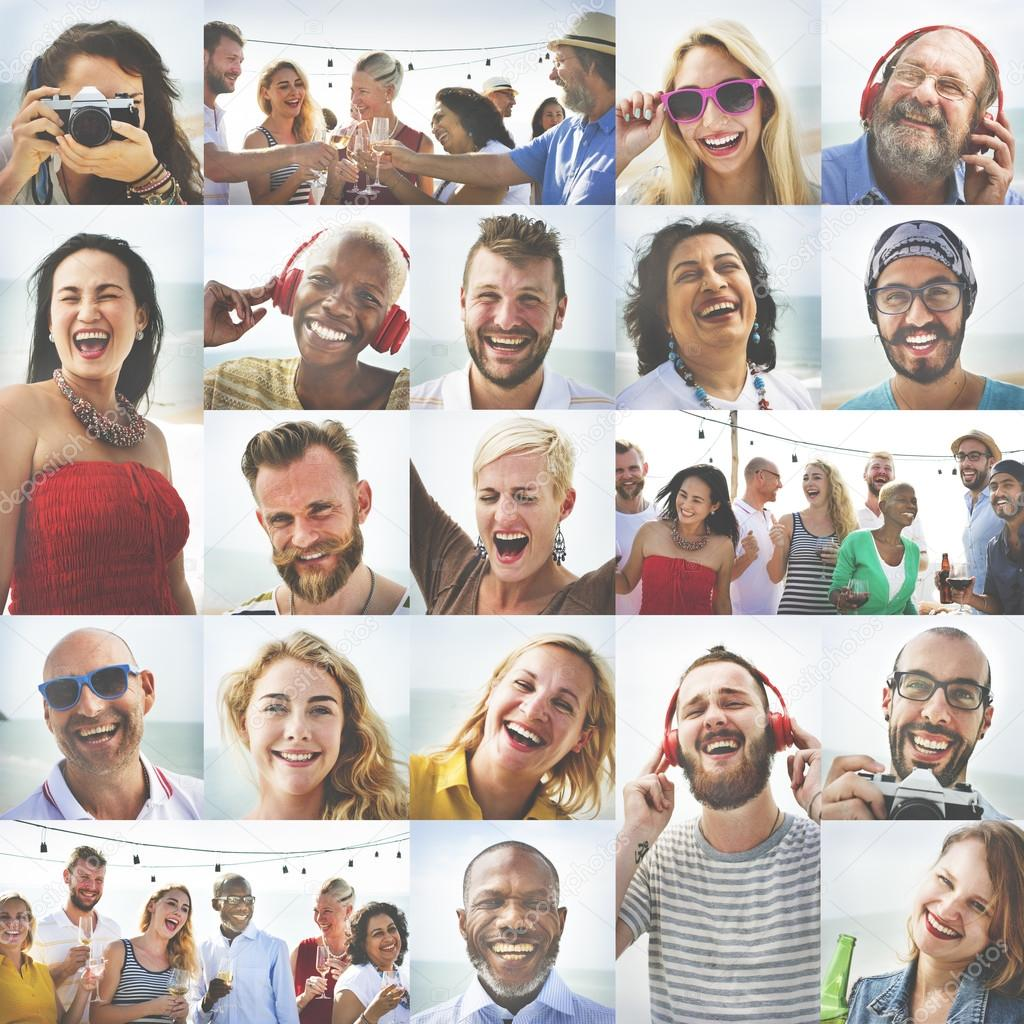

In [48]:
image = cv2.imread("images/face5.jpg")
cv2_imshow(image)

# **Convert the image to grayscale**

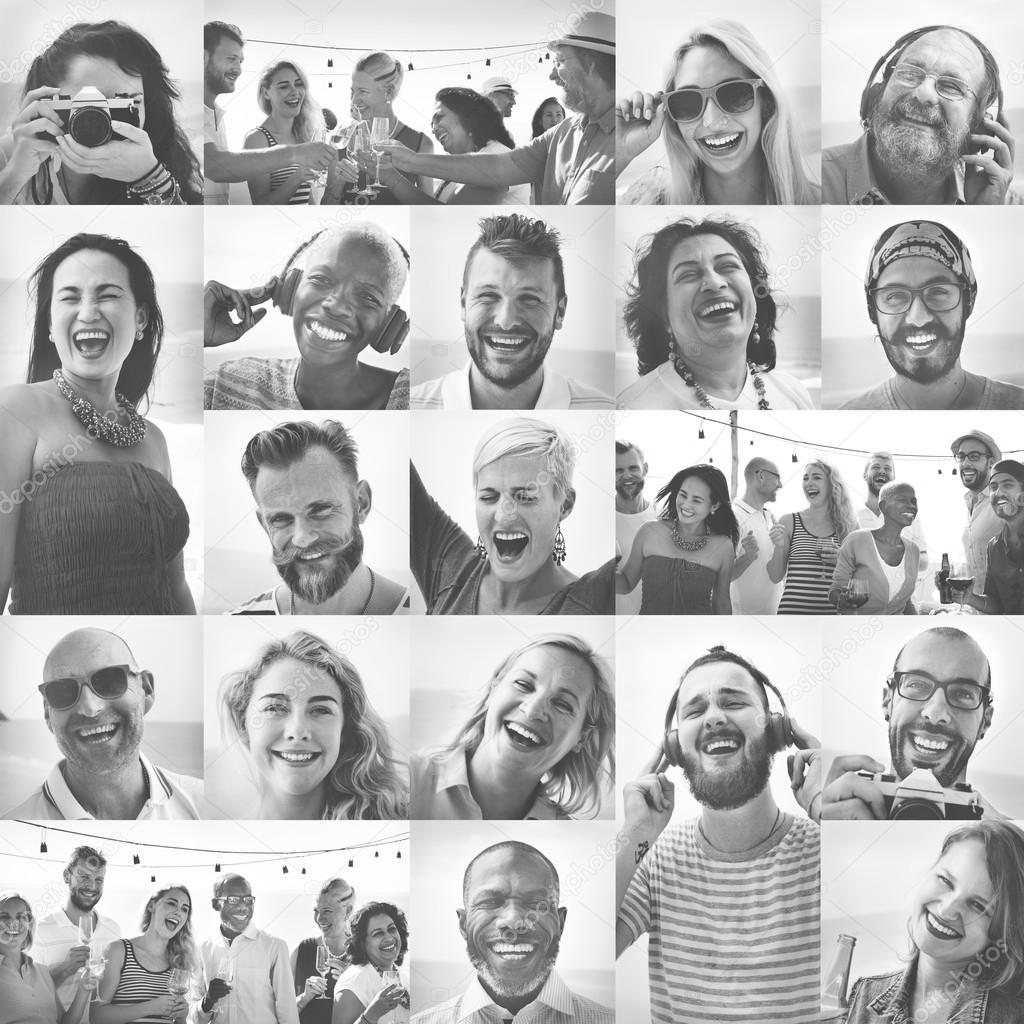

In [49]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

The parameters to the cv2.detect-MutliScale function tend to be sensitive, and some parameter choices for one set of images will not work for another set of images.

**In most cases, the offending culprit will be the scaleFactor parameter.**<br> 
In other cases it may be minNeighbors. <br>
As a debugging rule, start with the scaleFactor, adjust it as needed, and then move on to minNeighbors.


**Use the classifier, equalizerHist, and detectMultiScale to find faces in the grayscale image**

In [50]:
# initialize front face classifier
cascade = cv2.CascadeClassifier(
  "/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml")

frame = cv2.imread('face.jpeg')

# Convert to black-and-white
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blackwhite = cv2.equalizeHist(gray)

**Convert the image using histogram equalization**<br>
Basically, the images are modified to cover the full light spectrum. This makes the images appear to be taken under the same lighting conditions. 

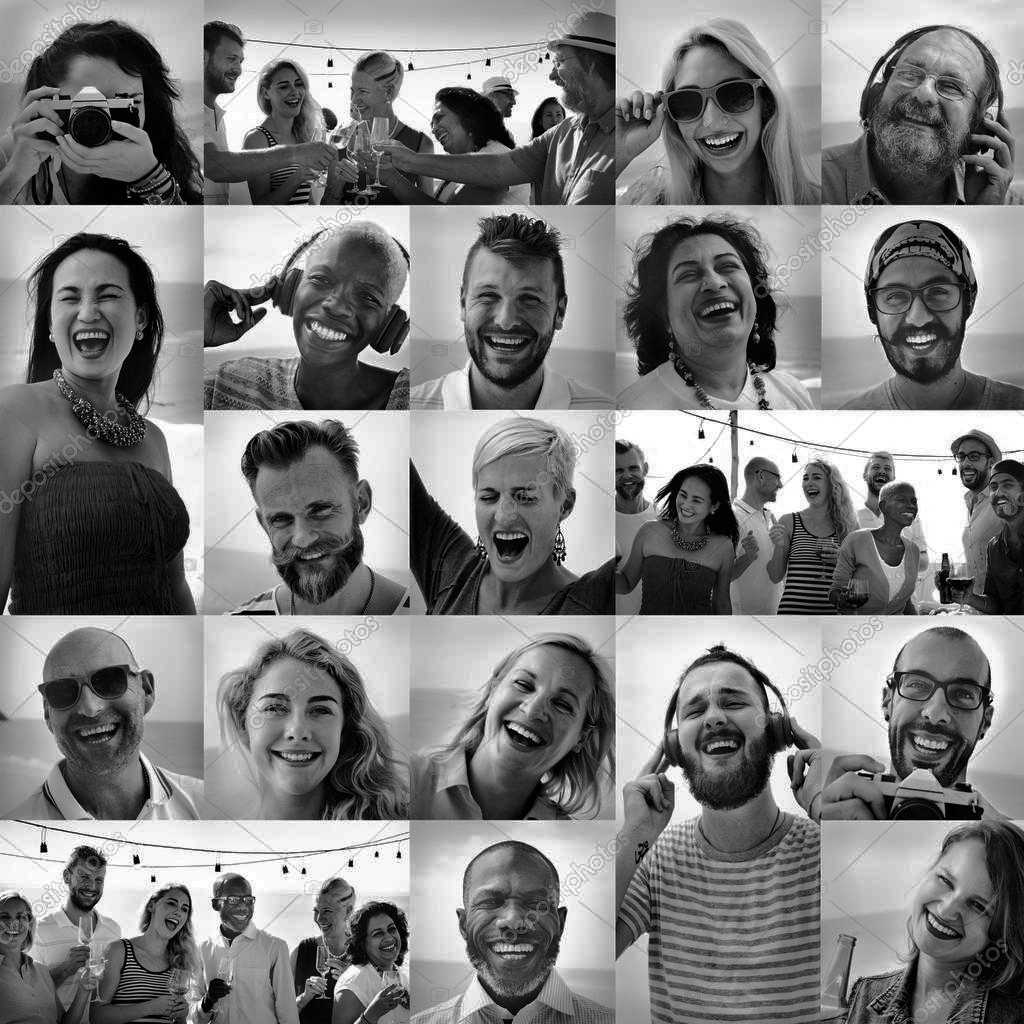

In [ ]:
cv2_imshow(blackwhite)

**Cascade Classifiers**<br>
Cascade classifiers are used to detect objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [51]:
rects = cascade.detectMultiScale(blackwhite, 
                                 scaleFactor=1.1, 
                                 minNeighbors=3, 
                                 minSize=(30, 30),
                                 flags=cv2.CASCADE_SCALE_IMAGE)

**Plot the rectangles on the full color image**
The classifier has found faces in the image. The rectangles are drawn around the found objects. <br>
Some faces were not detected, why?<br>
One face was detected twice, why?

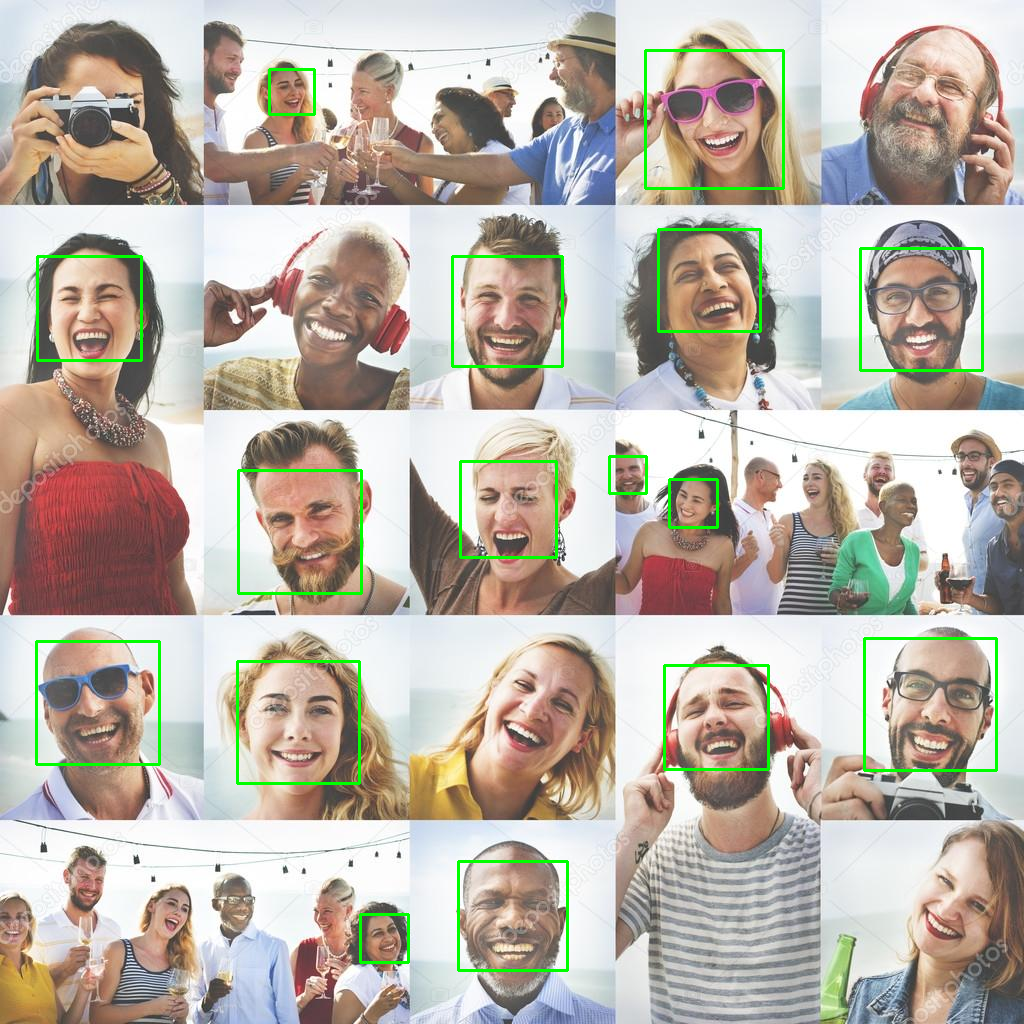

In [52]:
for (x, y, w, h) in rects:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)

While Haar cascades are quite fast and can obtain decent accuracy, they have two prominent shortcomings.

**The first is parameter tuning**. You’ll (likely) need to tweak the parameters of the detectMultiScale  function on a per-image basis. This can be a real pain, especially if you are looking to bulk process a dataset of images and cannot manually inspect the output of each face detection.

**The second shortcoming** is that Haar cascades can be highly prone to false positives, meaning that faces are detected when there really aren’t any there!

Again, this problem can be fixed by tuning the parameters of detectMultiScale  on a case-by-case basis.

If you find yourself in a situation where either method is not working to your required level of accuracy:

**Haar cascades are not giving you your desired level of accuracy**.
You need to train your own custom object detector.<br>

I would suggest using the HOG + Linear SVM framework, utilizing an image pyramid and sliding windows, you can detect objects in images at various scales and locations.

# **Assignment 1**
Detect all the faces in images/faces3.jpg

# **Detect Eyes**

There are two stages in a cascade classifier: <br>detection<br>
 training. <br><br>
OpenCV offers pre-trained classifiers such as eyes, face, and smile. <br>
<br>In order to detect, those classifiers, there are XML files associated with the classifiers that must be imported into your code.

Classifiers which can detect both open and closed eyes include:<br><br>

haarcascade_mcs_lefteye.xml<br>
haarcascade_mcs_righteye.xml<br>
haarcascade_lefteye_2splits.xml<br>
haarcascade_righteye_2splits.xml<br><br>
Classifiers which can only detect open eyes:<br>

haarcascade_eye.xml<br>
haarcascade_eye_tree_eyeglasses.xml<br><br>

The difference between haarcascade_eye.xml and haarcascade_eye_tree_eyeglasses.xml is <br>
>haarcascade_eye_tree_eyeglasses.xml can detect the eyes if the person is wearing glasses, but is not reliable if they do not wear glasses.

In [53]:
face_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye.xml')
eyeglasses_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
smile_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_smile.xml')
upperbody_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_upperbody.xml')


USing different cascade classifiers, see if the model does better at detecting faces. 

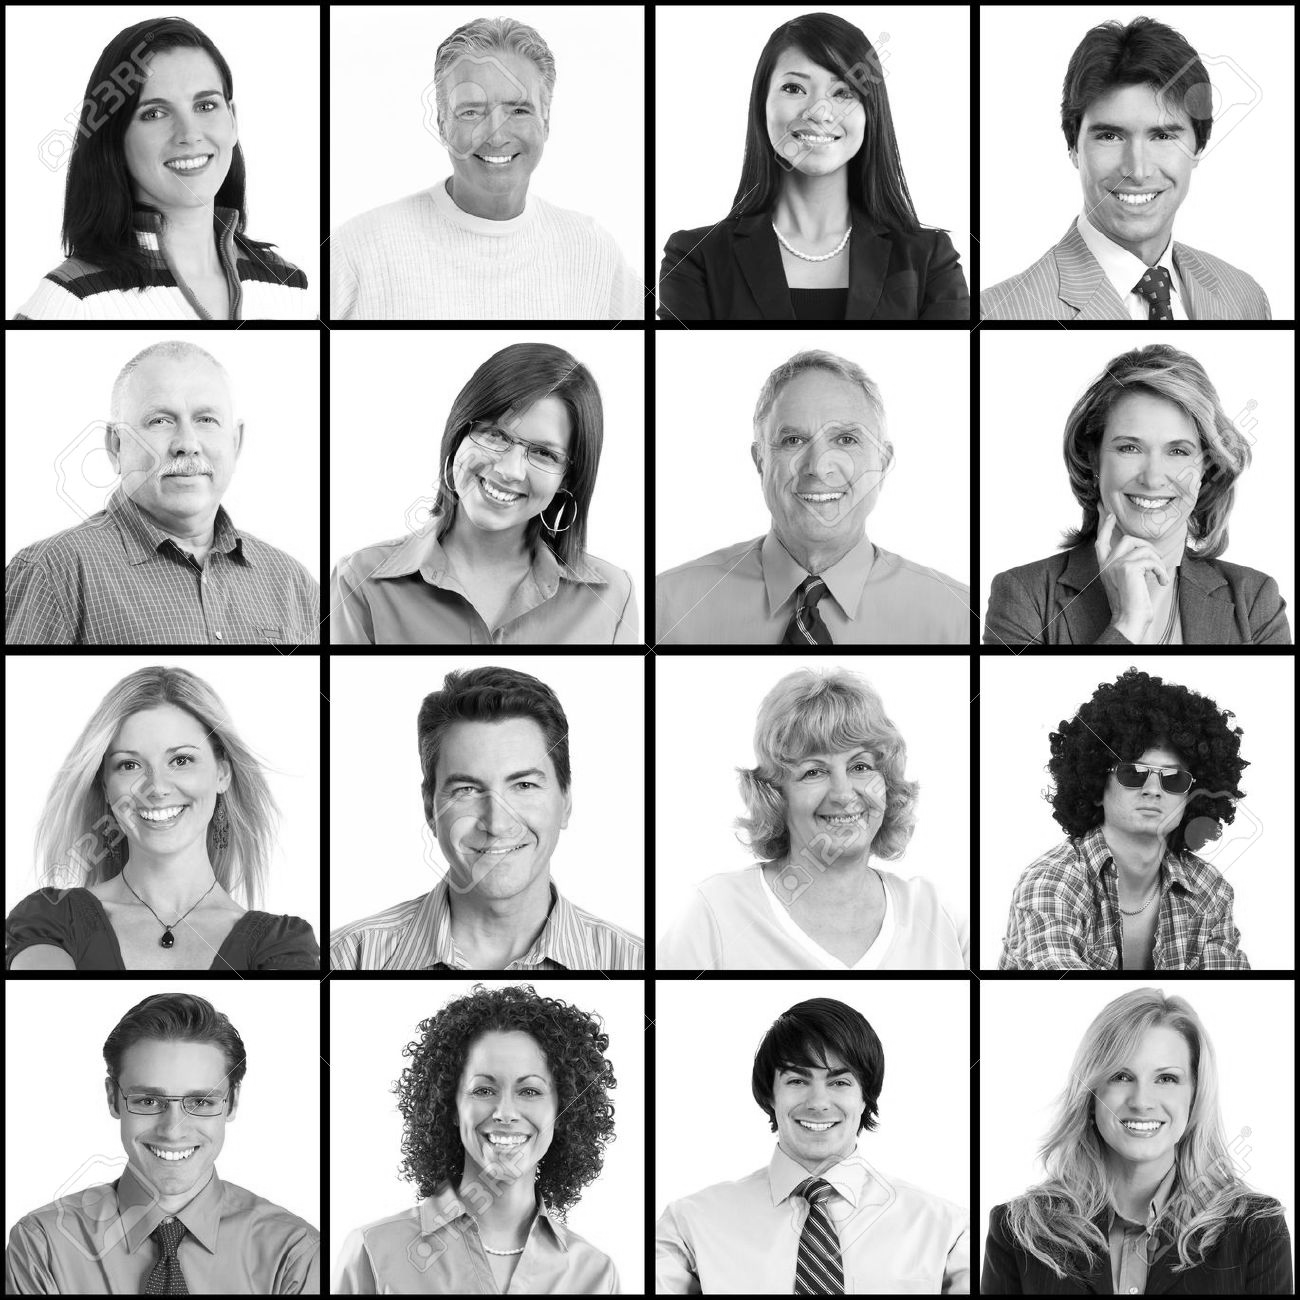

In [62]:
img = cv2.imread("images/faces2.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [63]:
blackwhite = cv2.equalizeHist(gray)

rects = cascade.detectMultiScale(blackwhite, 
                                 scaleFactor=1.1, 
                                 minNeighbors=3, 
                                 minSize=(30, 30),
                                 flags=cv2.CASCADE_SCALE_IMAGE)

In [64]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = smile_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

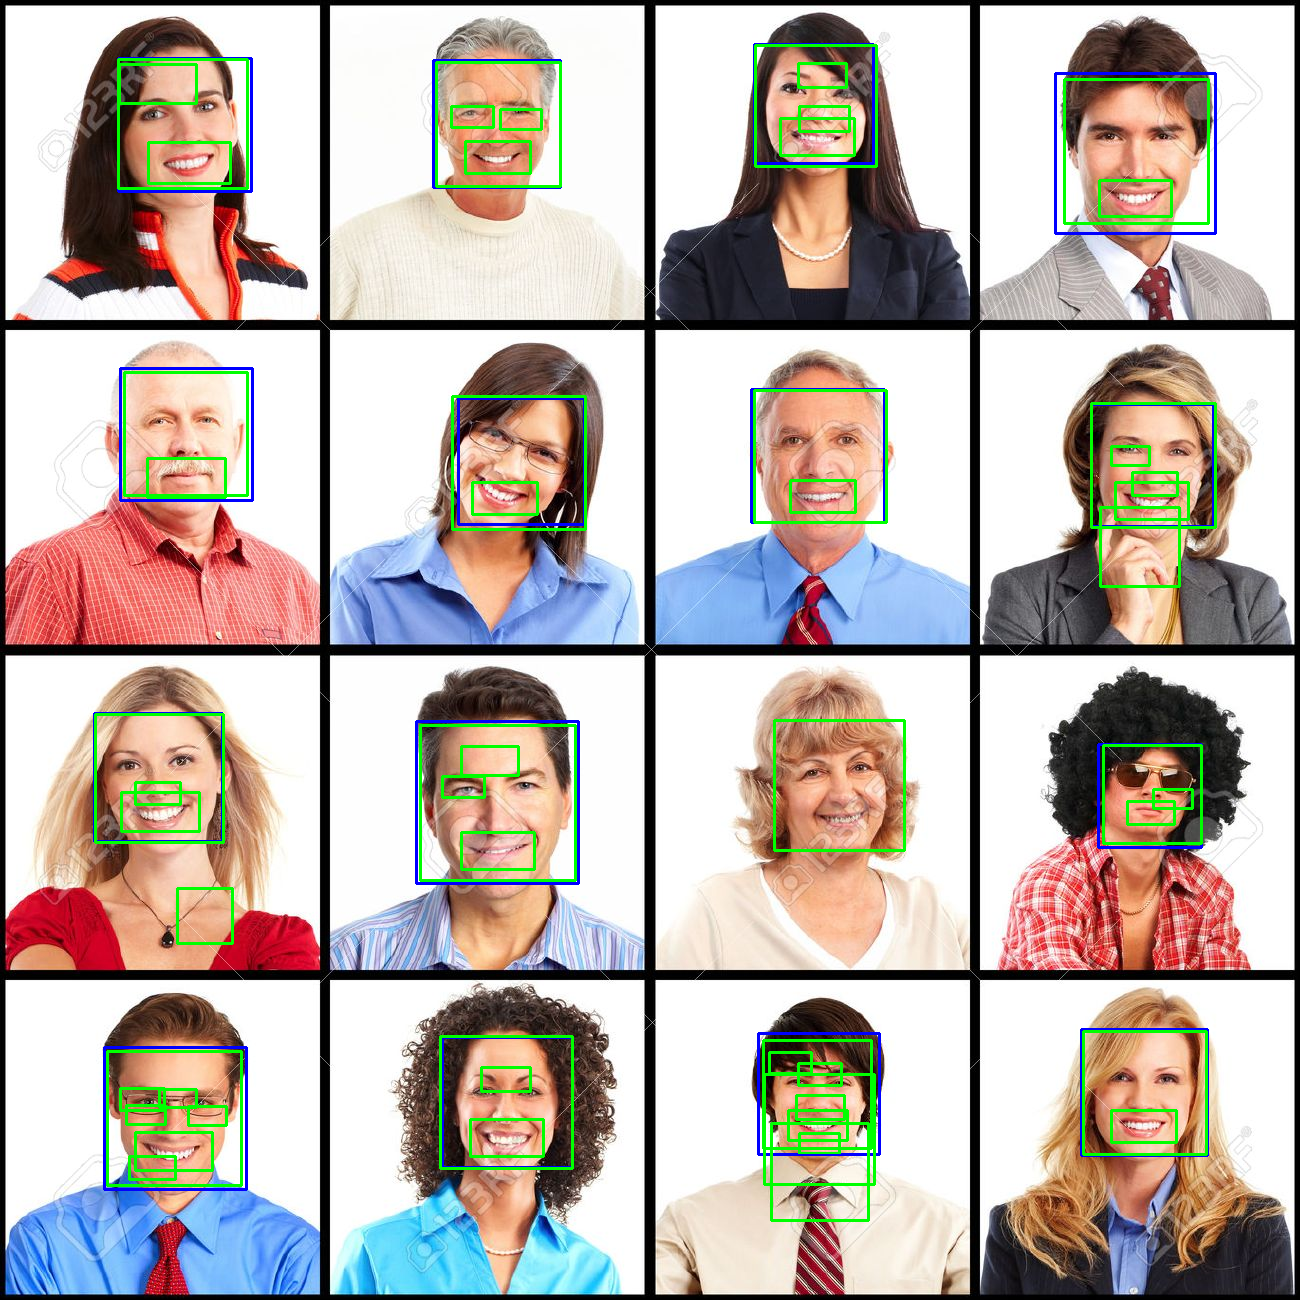

In [65]:
for (x, y, w, h) in rects:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(img)

# **Assignment 2**
Use at least one of the cascadeClassifiers to detect a facial feature in images/faces2.jpg